# Image creation

Creating an image based on our matrices to use opencv.

In [79]:
import os
import numpy
import pandas
import cv2

#List of usable patients 
data_ID=pandas.read_csv(os.path.join('..','List_Patient_HEGP.csv'),sep=",")

CD3PATH=os.path.join('..','Data_output','cache_HEGP','cd3','PAR170')
img_cd3_im=pandas.read_csv(os.path.join(CD3PATH,'Ratio_Cells_per_InvasiveFront'),sep=' ',header=None)
img_cd3_ct=pandas.read_csv(os.path.join(CD3PATH,'Ratio_Cells_per_Tumor'),sep=' ',header=None)

<Figure size 432x288 with 0 Axes>

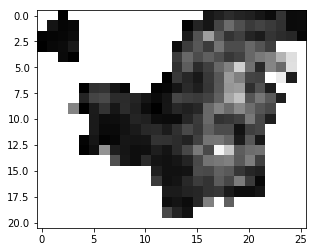

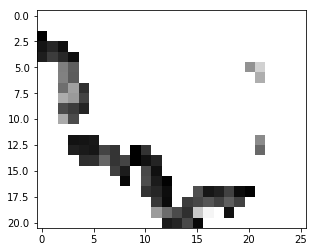

In [80]:
from matplotlib import pyplot as plt
plt.gray()
plt.show()
plt.imshow(img_cd3_ct, interpolation='nearest')

plt.gray()
plt.show()
plt.imshow(img_cd3_im, interpolation='nearest')


In [ ]:
plt.savefig('CD3_PAR170.jpg')

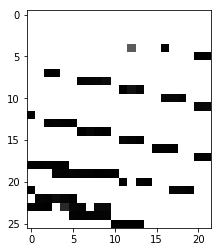

In [6]:
CD8PATH=os.path.join('..','Data_output','cache_HEGP','cd8','PAR170')
img_cd8=pandas.read_csv(os.path.join(CD8PATH,'Ratio_Cells_per_InvasiveFront'),sep=' ',header=None)
plt.gray()
plt.imshow(img_cd8, interpolation='nearest')

plt.show()

In [74]:
matrix1 = img_cd3_im
matrix2 = img_cd3_ct
rmatrix = numpy.empty(matrix1.shape)

for i in range((matrix2.shape[0]-1)):
    
    for j in range((matrix2.shape[1]-1)):
        print(i,j)
        if (matrix1[i][j]==numpy.nan or matrix2[i][j]==numpy.nan) and not ( matrix1[i][j]==numpy.nan and matrix2[i][j]==numpy.nan)  :
            if matrix1[i][j]==numpy.nan:
                rmatrix[i][j] = matrix2[i][j]
            else:
                rmatrix[i][j] = matrix1[i][j]
        elif matrix1[i][j]==numpy.nan and matrix2[i][j]==numpy.nan:
            rmatrix[i][j] = numpy.nan
        else:
            rmatrix[i][j] = matrix1[i][j] + matrix2[i][j]

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
9 19
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
10 16
10 17
10

KeyError: 21

Probleme quand on essaye d'accéder à la ligne 21 et plus. Cela pourrait avoir une impact sur l'extraction de features.
Je ne sais pas pourquoi.

In [77]:
len(matrix1)
matrix1.shape[0]
range(matrix1.shape[0]-1)
matrix1[0][0]
img_cd3_im.shape


(26, 21)

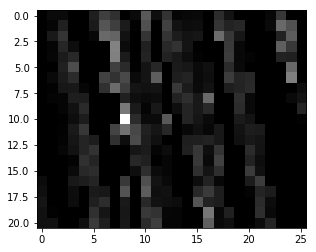

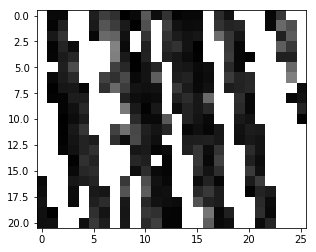

In [78]:
cd=numpy.add(numpy.nan_to_num(img_cd3_ct.T),numpy.nan_to_num(img_cd3_im.T))
plt.gray()
plt.imshow(cd, interpolation='nearest')

plt.show()
cd[cd==0]=numpy.nan
plt.gray()
plt.imshow(cd, interpolation='nearest')

plt.show()

In [ ]:
plt.savefig('CD8_PAR170.jpg')

In [81]:
sift = cv2.xfeatures2d.SIFT_create()



In [105]:
sift = cv2.xfeatures2d.SIFT_create()
gen = numpy.array(img_cd3_ct ,dtype=numpy.uint8)
kp,des=sift.detectAndCompute(gen,None)

In [106]:
kp

[<KeyPoint 000001AE98ED4720>,
 <KeyPoint 000001AE98ED40F0>,
 <KeyPoint 000001AE98ED46C0>,
 <KeyPoint 000001AE98ED4510>,
 <KeyPoint 000001AE98ED4540>,
 <KeyPoint 000001AE98ED47B0>]

In [ ]:
size_vector_cd3.loc['PAR170']

In [111]:
kp[0].pt

(7.348757743835449, 12.353886604309082)

In [109]:
kp[1].pt

(7.896059989929199, 10.239636421203613)

In [112]:
des

array([[  2.,   0.,   0.,   0.,   0.,   0.,   0.,   5.,   9.,   0.,   0.,
          0.,   0.,   0.,  25.,  74.,  32.,   6.,   2.,   0.,   6.,  33.,
         88., 115.,   6.,  11.,  34.,  18.,  41.,  79.,  27.,   6.,  37.,
          1.,   0.,   0.,   0.,   0.,   0.,   8., 125.,  11.,   1.,   0.,
          0.,   0.,  59., 125.,  49.,  11.,   9.,   0.,  28.,  39., 114.,
        125.,   3.,   2.,   1.,   0., 125., 125.,  30.,  11.,  37.,   6.,
          0.,   0.,   0.,   0.,   1.,   7., 125.,  91.,   6.,   0.,   0.,
          0.,   3.,  49.,  56.,  66.,  39.,   1.,   7.,  11.,  28.,  77.,
          5.,  11.,   7.,   7.,  35., 125.,  82.,  22.,   7.,   1.,   1.,
          0.,   0.,   0.,  15.,  61., 113.,  14.,   9.,   0.,   0.,   0.,
         21., 125.,  60.,  14.,  21.,  27.,   3.,   1.,  13., 103.,   5.,
          4.,  23.,  43.,  20.,  14.,  13.,  15.],
       [  2.,  16.,   2.,   0.,   0.,   0.,   0.,   0.,  62., 130.,  27.,
         13.,   8.,   3.,   5.,   8.,  27.,  10.,   2.,   8.,

In [83]:
size_vector_cd3=pandas.DataFrame(data=data_ID['OfficialID'])
size_vector_cd3["Size_Tumor_kp"]=numpy.nan
size_vector_cd3["Size_Tumor_des"]=numpy.nan
size_vector_cd3["Size_IM_kp"]=numpy.nan
size_vector_cd3["Size_IM_des"]=numpy.nan
size_vector_cd3["Size_img_h"]=numpy.nan
size_vector_cd3["Size_img_w"]=numpy.nan
size_vector_cd3["Size_img"]=numpy.nan
size_vector_cd3.set_index('OfficialID',drop=False,inplace=True)

size_vector_cd8=pandas.DataFrame(data=data_ID['OfficialID'])
size_vector_cd8["Size_Tumor_kp"]=numpy.nan
size_vector_cd8["Size_Tumor_des"]=numpy.nan
size_vector_cd8["Size_IM_kp"]=numpy.nan
size_vector_cd8["Size_IM_des"]=numpy.nan
size_vector_cd8["Size_img_h"]=numpy.nan
size_vector_cd8["Size_img_w"]=numpy.nan
size_vector_cd8["Size_img"]=numpy.nan
size_vector_cd8.set_index('OfficialID',drop=False,inplace=True)

In [84]:
for patient_id in data_ID['OfficialID']:
    CD3PATH=os.path.join('..','Data_output','cache_HEGP','cd3',patient_id)
    img_cd3=pandas.read_csv(os.path.join(CD3PATH,'Ratio_Cells_per_Tumor'),sep=' ',header=None)
    size_vector_cd3.loc[patient_id,'Size_img_h']=img_cd3.shape[0]
    size_vector_cd3.loc[patient_id,'Size_img_w']=img_cd3.shape[1]
    size_vector_cd3.loc[patient_id,'Size_img']=img_cd3.size
    gen = numpy.array(img_cd3 ,dtype=numpy.uint8)
    
    #kps=extract_features(gen)
    kp, des = sift.detectAndCompute(gen,None)
    try:
        size_vector_cd3.loc[patient_id,'Size_Tumor_kp']=des.shape[0]
        size_vector_cd3.loc[patient_id,'Size_Tumor_des']=des.shape[1]
    except (AttributeError):
        pass
    img_cd3=pandas.read_csv(os.path.join(CD3PATH,'Ratio_Cells_per_InvasiveFront'),sep=' ',header=None)
    gen = numpy.array(img_cd3 ,dtype=numpy.uint8)
    #kps=extract_features(gen)
    kp, des = sift.detectAndCompute(gen,None)
    try:
        size_vector_cd3.loc[patient_id,'Size_IM_kp']=des.shape[0]
        size_vector_cd3.loc[patient_id,'Size_IM_des']=des.shape[1]
    except (AttributeError):
        pass
    CD8PATH=os.path.join('..','Data_output','cache_HEGP','cd8',patient_id)
    img_cd8=pandas.read_csv(os.path.join(CD8PATH,'Ratio_Cells_per_Tumor'),sep=' ',header=None)
    size_vector_cd8.loc[patient_id,'Size_img_h']=img_cd8.shape[0]
    size_vector_cd8.loc[patient_id,'Size_img_w']=img_cd8.shape[1]
    size_vector_cd8.loc[patient_id,'Size_img']=img_cd8.size
    gen = numpy.array(img_cd8 ,dtype=numpy.uint8)
    
    #kps=extract_features(gen)
    kp, des = sift.detectAndCompute(gen,None)
    try:
        size_vector_cd8.loc[patient_id,'Size_Tumor_kp']=des.shape[0]
        size_vector_cd8.loc[patient_id,'Size_Tumor_des']=des.shape[1]
    except (AttributeError):
        pass
    img_cd8=pandas.read_csv(os.path.join(CD8PATH,'Ratio_Cells_per_InvasiveFront'),sep=' ',header=None)
    gen = numpy.array(img_cd8 ,dtype=numpy.uint8)
    #kps=extract_features(gen)
    kp, des = sift.detectAndCompute(gen,None)
    try:
        size_vector_cd8.loc[patient_id,'Size_IM_kp']=des.shape[0]
        size_vector_cd8.loc[patient_id,'Size_IM_des']=des.shape[1]
    except (AttributeError):
        pass

In [85]:
[min(size_vector_cd3['Size_Tumor_kp']),min(size_vector_cd3['Size_Tumor_des'])]

[1.0, 128.0]

In [86]:
[max(size_vector_cd3['Size_Tumor_kp']),max(size_vector_cd3['Size_Tumor_des'])]

[14.0, 128.0]

In [87]:
[min(size_vector_cd3['Size_IM_kp']),min(size_vector_cd3['Size_IM_des'])]

[nan, nan]

In [88]:
[max(size_vector_cd3['Size_IM_kp']),max(size_vector_cd3['Size_IM_des'])]

[nan, nan]

In [27]:
[min(size_vector_cd8['Size_Tumor_kp']),min(size_vector_cd8['Size_Tumor_des'])]

[1.0, 128.0]

In [91]:
[max(size_vector_cd8['Size_Tumor_kp']),max(size_vector_cd8['Size_Tumor_des'])]

[26.0, 128.0]

In [29]:
[min(size_vector_cd8['Size_IM_kp']),min(size_vector_cd8['Size_IM_des'])]

[1.0, 128.0]

In [92]:
[max(size_vector_cd8['Size_IM_kp']),max(size_vector_cd8['Size_IM_des'])]

[nan, nan]

# Identifier la taille du vector de features
Pour les valeurs manquantes les remplacer par la médiane des vecteurs existants


In [107]:
size_vector_cd3.loc['PAR170']

OfficialID        PAR170
Size_Tumor_kp          6
Size_Tumor_des       128
Size_IM_kp           NaN
Size_IM_des          NaN
Size_img_h            21
Size_img_w            26
Size_img             546
Name: PAR170, dtype: object

In [90]:
 pandas.isnull(size_vector_cd8).any(1).nonzero()[0]

array([  0,   1,   3,   4,   5,   6,   8,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  21,  23,  26,  27,  29,  30,  35,  37,  38,  40,
        42,  43,  44,  45,  46,  47,  48,  53,  54,  55,  57,  58,  59,
        60,  62,  63,  64,  65,  67,  68,  70,  71,  72,  73,  74,  75,
        76,  80,  81,  84,  86,  96,  97,  99, 100, 101, 103, 105, 106,
       108, 110, 112, 113, 114, 116, 118, 121, 125, 128, 134, 136, 137,
       138, 140, 142, 143, 144, 145, 146, 150, 151, 154, 155, 156, 157,
       159, 162, 163, 164, 166, 167, 168, 173, 174, 176, 177, 178, 179,
       180, 182, 183, 185, 187, 189, 195, 198, 199, 203, 204, 205, 209,
       210, 211, 213, 214, 216, 219, 220, 221, 223, 225, 226, 227, 229,
       230, 231, 233, 234, 235, 237, 238, 241, 242, 243, 245, 248, 249,
       251, 252, 258, 260, 262, 263, 264, 268, 270, 272, 273, 275, 277,
       278, 279, 281, 286, 287, 290, 292, 293, 294], dtype=int64)

In [96]:
kp[0].pt

(17.3590087890625, 12.233915328979492)

In [35]:
 len(pandas.isnull(size_vector_cd3).any(1).nonzero()[0])

121

In [34]:
len( pandas.isnull(size_vector_cd8).any(1).nonzero()[0])

155

In [43]:
import matplotlib.pyplot as plt

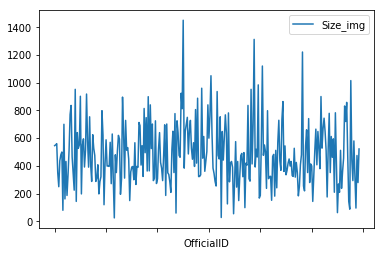

In [50]:
plt.figure()
df=pandas.DataFrame(data=size_vector_cd3['Size_img'])
df.plot()

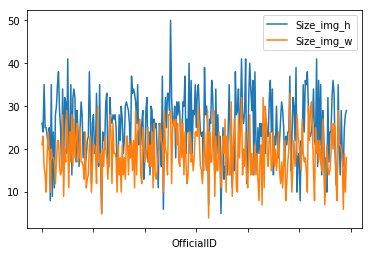

In [49]:
plt.figure()
df=pandas.DataFrame(data=size_vector_cd3[['Size_img_h','Size_img_w']])
df.plot()

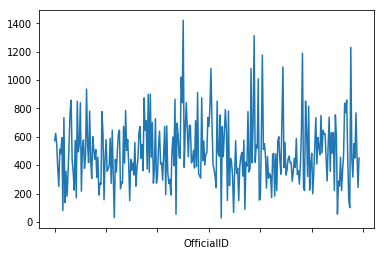

In [47]:
plt.figure()
df=size_vector_cd8['Size_img']
df.plot()

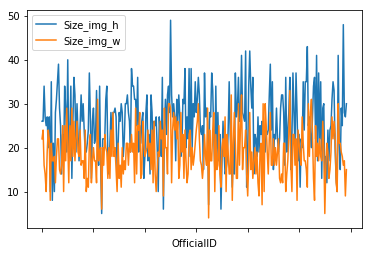

In [51]:
plt.figure()
df=pandas.DataFrame(data=size_vector_cd8[['Size_img_h','Size_img_w']])
df.plot()

gen_bow_features

clustering et construire l'histogramme

possible différent algo clustering


isoler tumeur, IM tres petits

voir nombre patients

In [114]:
size_vector_cd3=pandas.DataFrame(data=data_ID['OfficialID'])
size_vector_cd3["Size_Tumor_kp"]=numpy.nan
size_vector_cd3["Size_Tumor_des"]=numpy.nan

size_vector_cd3["Size_img_h"]=numpy.nan
size_vector_cd3["Size_img_w"]=numpy.nan
size_vector_cd3["Size_img"]=numpy.nan
size_vector_cd3.set_index('OfficialID',drop=False,inplace=True)

size_vector_cd8=pandas.DataFrame(data=data_ID['OfficialID'])
size_vector_cd8["Size_Tumor_kp"]=numpy.nan
size_vector_cd8["Size_Tumor_des"]=numpy.nan

size_vector_cd8["Size_img_h"]=numpy.nan
size_vector_cd8["Size_img_w"]=numpy.nan
size_vector_cd8["Size_img"]=numpy.nan
size_vector_cd8.set_index('OfficialID',drop=False,inplace=True)

In [115]:
for patient_id in data_ID['OfficialID']:
    CD3PATH=os.path.join('..','Data_output','cache_HEGP','cd3',patient_id)
    img_cd3=pandas.read_csv(os.path.join(CD3PATH,'Ratio_Cells_per_Tumor'),sep=' ',header=None)
    size_vector_cd3.loc[patient_id,'Size_img_h']=img_cd3.shape[0]
    size_vector_cd3.loc[patient_id,'Size_img_w']=img_cd3.shape[1]
    size_vector_cd3.loc[patient_id,'Size_img']=img_cd3.size
    gen = numpy.array(img_cd3 ,dtype=numpy.uint8)
    
    #kps=extract_features(gen)
    kp, des = sift.detectAndCompute(gen,None)
    try:
        size_vector_cd3.loc[patient_id,'Size_Tumor_kp']=des.shape[0]
        size_vector_cd3.loc[patient_id,'Size_Tumor_des']=des.shape[1]
    except (AttributeError):
        pass
    
    CD8PATH=os.path.join('..','Data_output','cache_HEGP','cd8',patient_id)
    img_cd8=pandas.read_csv(os.path.join(CD8PATH,'Ratio_Cells_per_Tumor'),sep=' ',header=None)
    size_vector_cd8.loc[patient_id,'Size_img_h']=img_cd8.shape[0]
    size_vector_cd8.loc[patient_id,'Size_img_w']=img_cd8.shape[1]
    size_vector_cd8.loc[patient_id,'Size_img']=img_cd8.size
    gen = numpy.array(img_cd8 ,dtype=numpy.uint8)
    
    #kps=extract_features(gen)
    kp, des = sift.detectAndCompute(gen,None)
    try:
        size_vector_cd8.loc[patient_id,'Size_Tumor_kp']=des.shape[0]
        size_vector_cd8.loc[patient_id,'Size_Tumor_des']=des.shape[1]
    except (AttributeError):
        pass
    

In [116]:
 len(pandas.isnull(size_vector_cd3).any(1).nonzero()[0])

42

In [117]:
 len(pandas.isnull(size_vector_cd8).any(1).nonzero()[0])

71

In [118]:
size_vector_cd3

,OfficialID,Size_Tumor_kp,Size_Tumor_des,Size_img_h,Size_img_w,Size_img
OfficialID,,,,,,
PAR170,PAR170,6.0,128.0,21.0,26.0,546.0
PAR171,PAR171,5.0,128.0,23.0,24.0,552.0
PAR172,PAR172,5.0,128.0,16.0,35.0,560.0
PAR173,PAR173,2.0,128.0,14.0,25.0,350.0
PAR174,PAR174,NaN,NaN,10.0,25.0,250.0
PAR175,PAR175,1.0,128.0,19.0,23.0,437.0
PAR176,PAR176,2.0,128.0,24.0,20.0,480.0
PAR177,PAR177,5.0,128.0,20.0,25.0,500.0
PAR178,PAR178,NaN,NaN,10.0,8.0,80.0


In [ ]:
for patient_id in data_ID['OfficialID']:
    CD3PATH=os.path.join('..','Data_output','cache_HEGP','cd3',patient_id)
    img_cd3=pandas.read_csv(os.path.join(CD3PATH,'Ratio_Cells_per_Tumor'),sep=' ',header=None)
    size_vector_cd3.loc[patient_id,'Size_img_h']=img_cd3.shape[0]
    size_vector_cd3.loc[patient_id,'Size_img_w']=img_cd3.shape[1]
    size_vector_cd3.loc[patient_id,'Size_img']=img_cd3.size
    gen = numpy.array(img_cd3 ,dtype=numpy.uint8)
    
    #kps=extract_features(gen)
    kp, des = sift.detectAndCompute(gen,None)
    try:
        size_vector_cd3.loc[patient_id,'Size_Tumor_kp']=des.shape[0]
        size_vector_cd3.loc[patient_id,'Size_Tumor_des']=des.shape[1]
    except (AttributeError):
        pass
    
    CD8PATH=os.path.join('..','Data_output','cache_HEGP','cd8',patient_id)
    img_cd8=pandas.read_csv(os.path.join(CD8PATH,'Ratio_Cells_per_Tumor'),sep=' ',header=None)
    size_vector_cd8.loc[patient_id,'Size_img_h']=img_cd8.shape[0]
    size_vector_cd8.loc[patient_id,'Size_img_w']=img_cd8.shape[1]
    size_vector_cd8.loc[patient_id,'Size_img']=img_cd8.size
    gen = numpy.array(img_cd8 ,dtype=numpy.uint8)
    
    #kps=extract_features(gen)
    kp, des = sift.detectAndCompute(gen,None)
    try:
        size_vector_cd8.loc[patient_id,'Size_Tumor_kp']=des.shape[0]
        size_vector_cd8.loc[patient_id,'Size_Tumor_des']=des.shape[1]
    except (AttributeError):
        pass

img_descs.append(desc)